In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('./Task1/2020_Potato_Agra_Price.csv')
data_df.head(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1.0,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
1,2.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-29
2,3.0,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
3,4.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-27
4,5.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-26
5,6.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-25
6,7.0,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-23
7,8.0,Agra,Achnera,Potato,Desi,FAQ,820.0,920.0,870.0,2020-12-22
8,9.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-21
9,10.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-20


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl no.                     1827 non-null   float64
 1   District Name              1827 non-null   object 
 2   Market Name                1827 non-null   object 
 3   Commodity                  1827 non-null   object 
 4   Variety                    1827 non-null   object 
 5   Grade                      1827 non-null   object 
 6   Min Price (Rs./Quintal)    1827 non-null   float64
 7   Max Price (Rs./Quintal)    1827 non-null   float64
 8   Modal Price (Rs./Quintal)  1827 non-null   float64
 9   Price Date                 1827 non-null   object 
dtypes: float64(4), object(6)
memory usage: 142.9+ KB


There are no missing values. Let's first convert date to datetime datatype and see the unique values from 'category' columns.

In [5]:
data_df['Price Date'] = pd.to_datetime(data_df['Price Date'])

cat_cols = data_df.select_dtypes(include=['object']).columns
cat_cols

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade'], dtype='object')

In [6]:
for i in cat_cols:
    print(i)
    print(data_df[i].unique(), '\n')

District Name
['Agra'] 

Market Name
['Achnera' 'Agra' 'Fatehabad' 'Fatehpur Sikri' 'Jagnair' 'Jarar'
 'Khairagarh' 'Samsabad'] 

Commodity
['Potato'] 

Variety
['Desi' 'Potato' 'Local' 'Other'] 

Grade
['FAQ'] 



Here, 
1. We've 8 Mandis/Markets in Agra district of Uttar Pradesh.
2. The 'variety' feature takes 4 values. 
3. All data points are 'FAQ' Grade.

Now, let's explore the price pattens. Also, drop the columns which we don't need for now.

In [7]:
data_df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [8]:
data_df = data_df[['Market Name', 'Variety', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date']]
data_df.columns = ['MarketName', 'Variety', 'MinPrice', 'MaxPrice',
       'ModalPrice', 'PriceDate']
data_df

,MarketName,Variety,MinPrice,MaxPrice,ModalPrice,PriceDate
0,Achnera,Desi,900.0,1000.0,950.0,2020-12-30
1,Achnera,Desi,800.0,900.0,850.0,2020-12-29
2,Achnera,Desi,850.0,950.0,900.0,2020-12-28
3,Achnera,Desi,800.0,900.0,850.0,2020-12-27
4,Achnera,Desi,800.0,900.0,850.0,2020-12-26
...,...,...,...,...,...,...
1822,Samsabad,Local,1000.0,1200.0,1100.0,2020-01-06
1823,Samsabad,Local,1000.0,1200.0,1100.0,2020-01-05
1824,Samsabad,Local,1100.0,1300.0,1200.0,2020-01-04
1825,Samsabad,Local,1100.0,1300.0,1200.0,2020-01-02


<AxesSubplot:ylabel='MarketName'>

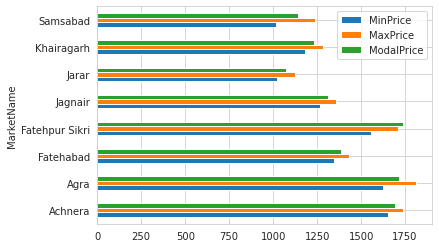

In [9]:
data_df.groupby(['MarketName'])['MinPrice', 'MaxPrice','ModalPrice'].mean().plot(kind='barh')

In 2020 :

1. Average of all three prices was high for Achnera, Agra and Fatehpur Sikri Markets in comparison to other Markets.
2. Price Averages were low for Jarar, Khairgarh and Samsabad.

Let's check the date-wise prices for all 8 Markets.

<AxesSubplot:ylabel='MarketName,Variety'>

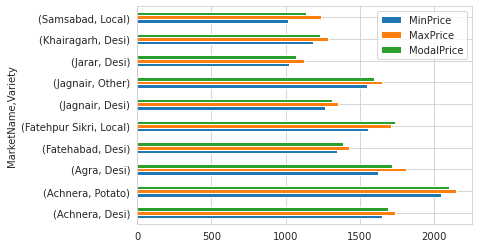

In [10]:
data_df.groupby(['MarketName', 'Variety'])['MinPrice', 'MaxPrice','ModalPrice'].mean().plot(kind='barh')

Looks like different varieties are sold at different Markets.

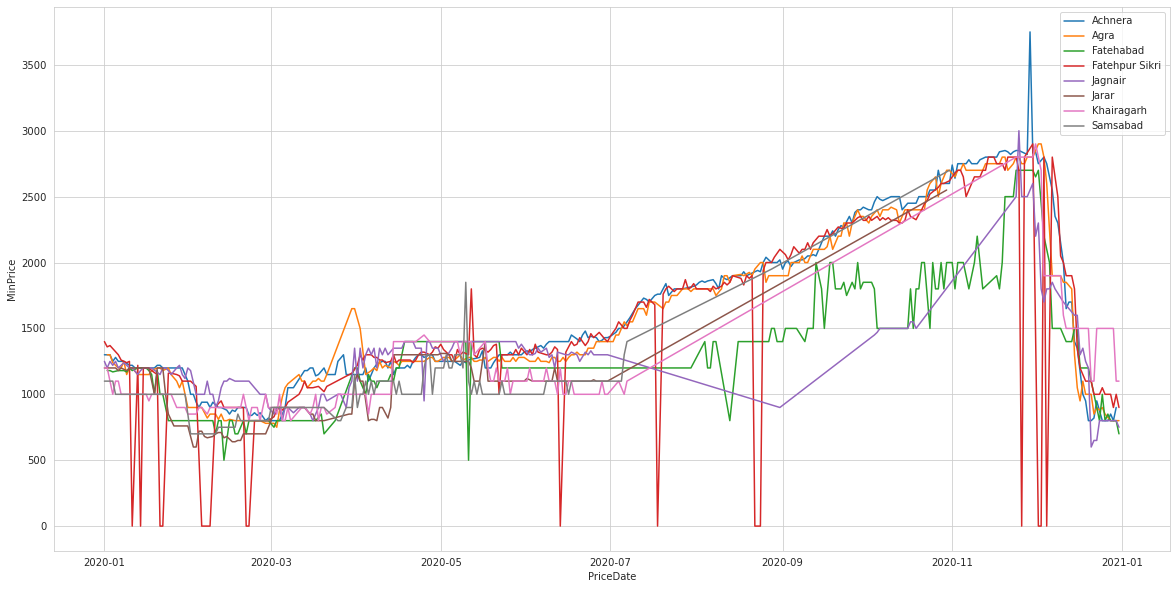

In [11]:
plt.figure(figsize=(20, 10))
markets = data_df['MarketName'].unique()

for i in markets:
    tmp = data_df[data_df['MarketName'] == i]
    sns.lineplot(tmp.PriceDate, tmp['MinPrice'], label=i)

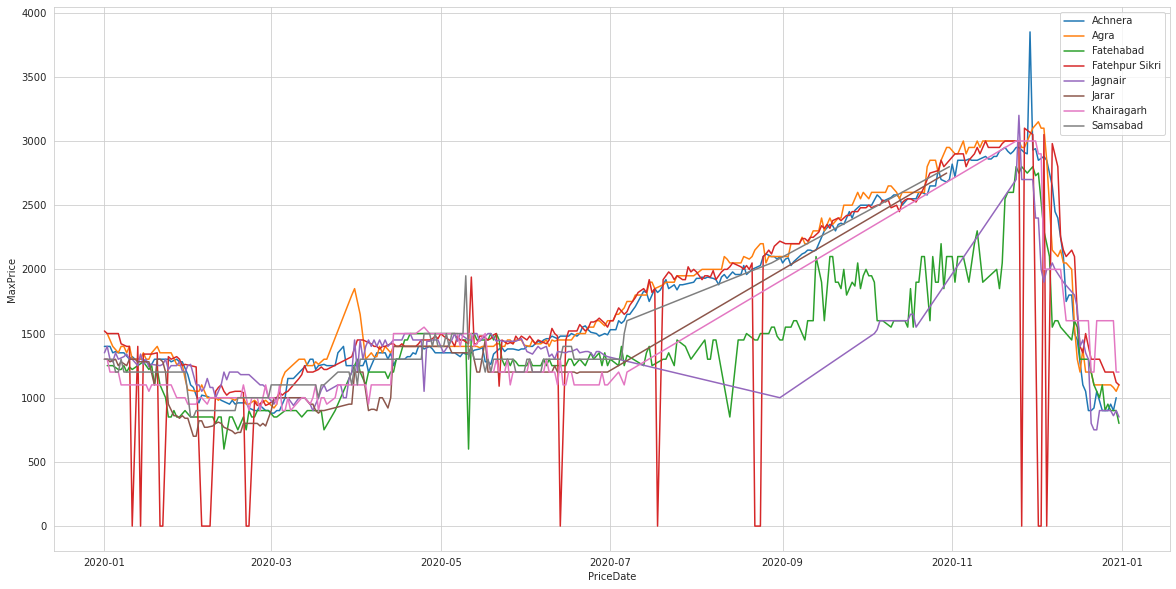

In [12]:
plt.figure(figsize=(20, 10))
markets = data_df['MarketName'].unique()

for i in markets:
    tmp = data_df[data_df['MarketName'] == i]
    sns.lineplot(tmp.PriceDate, tmp['MaxPrice'], label=i)

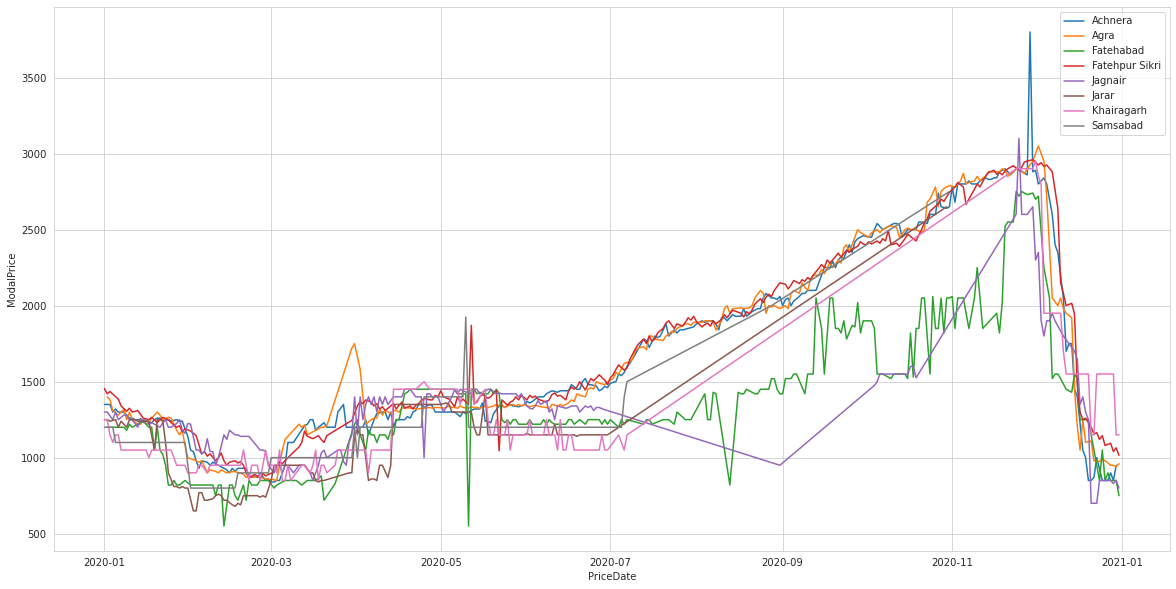

In [13]:
plt.figure(figsize=(20, 10))
markets = data_df['MarketName'].unique()

for i in markets:
    tmp = data_df[data_df['MarketName'] == i]
    sns.lineplot(tmp.PriceDate, tmp['ModalPrice'], label=i)

Here, 
1. In case of all prices, we see an increasing trend startinng from Sept, 2020.
2. And a steep decreasing trend is observed starting from Dec, 2020.
3. Prices are 0 for some days in Fatehpur Sikri Market. Might be due to Holidays or some other reason.
4. There is high fluctuation in prices at Fatehabad Market.